# Justin Ganiban - HW1 Solutions
# Problem 3: Unconstrained Optimization

### Overview

This provides a detailed solution for Problem 3 of homework 1: unconstrained and constrained optimization problems using **gradient descent** and the **log-barrier method**. **JAX** is used for automatic differentiation and numerical optimization.

## Part (a): Gradient Descent for Unconstrained Optimization

We consider the function:

$$
f(x) = (x + 2)^2 + 5 \tanh(x)
$$

This function cannot be minimized analytically due to its transcendental derivative. Instead, we'll apply **gradient descent** to numerically find the minimizing value of \(x\).

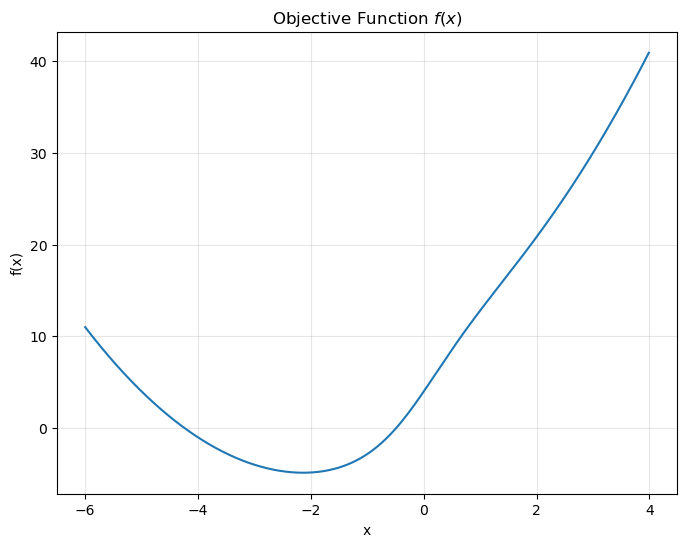

In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x + 2)**2 + 5 * jnp.tanh(x)

# Plot f(x)
args = np.arange(-6, 4, 0.01)
plt.figure(figsize=(8, 6))
plt.plot(args, f(args))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Objective Function $f(x)$')
plt.grid(alpha=0.3)
plt.show()

### Implement Gradient Descent

The following function implements the gradient descent method, iteritavely computing gradients using JAX until the solution converges within a defined tolerance.

In [2]:
def minimize_with_gradient_descent(func, initial_guess, step_size, convergence_tol=1e-8):
    curr_x = initial_guess
    grad_func = jax.grad(func)
    
    while True:
        grad = grad_func(curr_x)
        next_x = curr_x - step_size * grad
        if jnp.abs(next_x - curr_x) < convergence_tol:
            return curr_x
        curr_x = next_x

Running the optimizaiton function with initial guess of 5.0 and step size 0.1.

In [3]:
x_opt = minimize_with_gradient_descent(f, initial_guess=5.0, step_size=0.1)
print('Optimal x:', x_opt)
print('Optimal f(x):', f(x_opt))

Optimal x: -2.135782
Optimal f(x): -4.8438854


The following code visualizes the solution on f(x). It is evident that the optimization routine converged to the minimum.

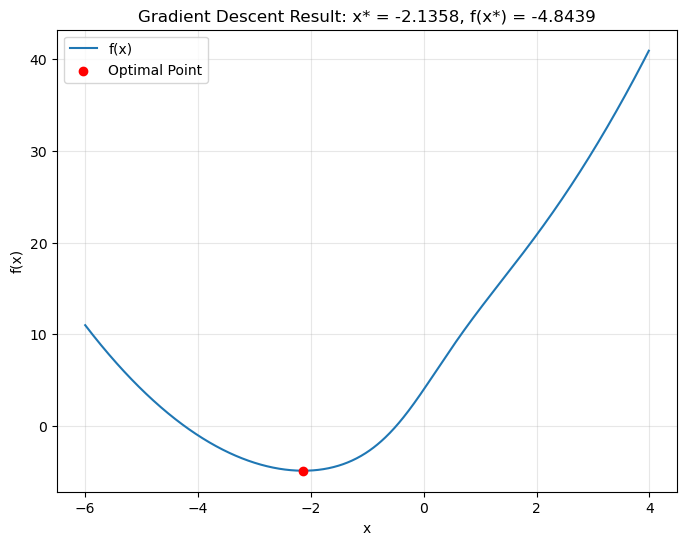

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(args, f(args), label='f(x)')
plt.scatter(x_opt, f(x_opt), color='red', zorder=5, label='Optimal Point')
plt.title(f'Gradient Descent Result: x* = {x_opt:.4f}, f(x*) = {f(x_opt):.4f}')
plt.grid(alpha=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

## Part (b): The Log-Barrier Method for Constrained Optimization

We now want to constrain our optimizaiton problem to only consider x > 1.
We reformulate our problem using the **log-barrier function**:

$$
\phi(x) = f(x) - t \ln(-g(x)) \quad \text{where } g(x) = 1 - x
$$

where t is a tuning parameter of our choosing. 

In [5]:
def g(x):
    return 1 - x

def phi(f, x, g, t):
    return f(x) - t * jnp.log(-g(x))

Here we visualize the behavior of the log-barrier function as t varies. As t increases, the barrier term −tlog⁡(x−1) becomes more negative near the boundary, creating a stronger penalty for approaching the constraint. Therefore, the optimizer is pushed farther away from the boundary at x=1 for larger t. This makes the modified function ϕ(x) deviate from the original function f(x), especially near x=1.

Conversely, as t→0, the barrier term becomes negligible. ϕ(x)≈f(x) except very close to x=1. This means ϕ(x) starts to approximates the original objective function more closely — while still enforcing the constraint x>1 by becoming infinite at x=1.

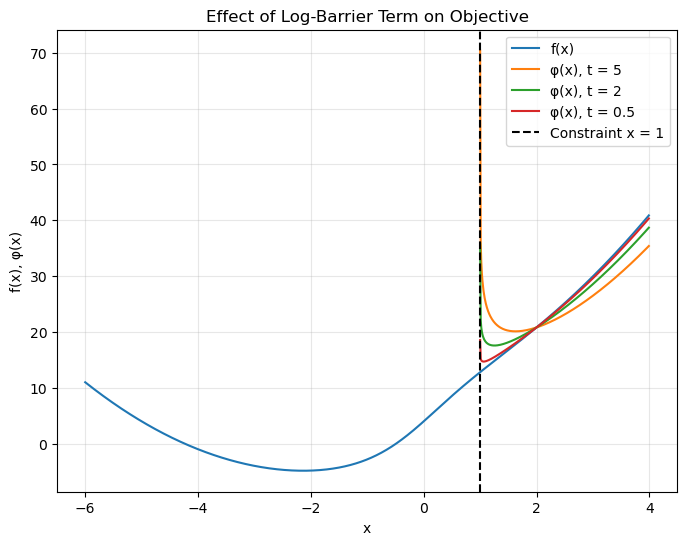

In [6]:
x_f = np.arange(-6, 4, 0.01)
x_phi = np.arange(1.00001, 4, 0.01)

plt.figure(figsize=(8, 6))
plt.plot(x_f, f(x_f), label='f(x)')
for t in [5, 2, 0.5]:
    plt.plot(x_phi, phi(f, x_phi, g, t), label=f'φ(x), t = {t}')
plt.axvline(1, color='black', linestyle='dashed', label='Constraint x = 1')
plt.xlabel('x')
plt.ylabel('f(x), φ(x)')
plt.title('Effect of Log-Barrier Term on Objective')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

## Part (c): Minimizing the Log-Barrier Function

We now want to find the minimum of the log-barrier objective function. The next section of code calls the **minimize_with_gradient_descent** function on the log-barrier objective function. It is important to note that the initial guess should be within the feasible region, i.e. x > 1. Additionally note that as t decreases, the slope of the function near the boundary becomes steeper. Because of this, smaller time steps are needed to properly enforce the constraint.

You can see that the optimiziation problem correctly finds the minimum of each log-barrier function for each value of t, and as t approaches 0 the minimum gets closer to the value of the original function at the barrier.

t = 5: optimal x = 1.6273, f(x) = 17.7860
t = 2: optimal x = 1.2531, f(x) = 14.8287
t = 0.5: optimal x = 1.0623, f(x) = 13.3100


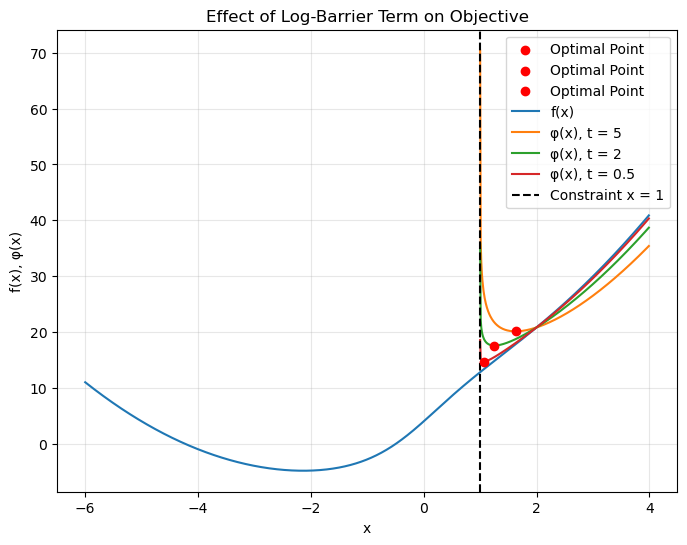

In [7]:
from functools import partial

t_values = [5, 2, 0.5]
initial_guess = 3.0

plt.figure(figsize=(8, 6))
for t in t_values:
    phi_t = partial(phi, f, g=g, t=t)
    if t > 2:
        step_size = 0.1 
    elif t > 0.1: 
        step_size = 0.005
    else:
        step_size = 0.0001

    x_opt = minimize_with_gradient_descent(phi_t, initial_guess, step_size)
    plt.scatter(x_opt, phi_t(x_opt), color='red', zorder=5, label='Optimal Point')
    print(f"t = {t}: optimal x = {x_opt:.4f}, f(x) = {f(x_opt):.4f}")

plt.plot(x_f, f(x_f), label='f(x)')
for t in [5, 2, 0.5]:
    plt.plot(x_phi, phi(f, x_phi, g, t), label=f'φ(x), t = {t}')
plt.axvline(1, color='black', linestyle='dashed', label='Constraint x = 1')
plt.xlabel('x')
plt.ylabel('f(x), φ(x)')
plt.title('Effect of Log-Barrier Term on Objective')
plt.grid(alpha=0.3)
plt.legend()
plt.show()